In [19]:
df_1 = _dntk.execute_sql(
  'SELECT\n  DATE(session_start) AS day,\n  COUNT(*) AS sessions,\n  SUM(order_count) AS total_orders,\n  SUM(session_revenue) AS revenue,\n  ROUND(AVG(session_revenue),2) AS revenue_per_session,\n  ROUND(100.0 * SUM(CASE WHEN order_count > 0 THEN 1 END) / COUNT(*), 2) AS conversion_rate_pct,\n  AVG(session_duration_seconds) AS avg_session_seconds,\n  AVG(event_count) AS avg_events_per_session\nFROM fact_sessions\nGROUP BY 1\nORDER BY 1;\n\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_1

,day,sessions,total_orders,revenue,revenue_per_session,conversion_rate_pct,avg_session_seconds,avg_events_per_session
0,2025-02-23,3375,3393.0,20757.0,6.15,100.0,47.870514,1.202667
1,2025-02-24,3091,3109.0,25108.6,8.12,100.0,39.766460,1.197671
2,2025-02-25,2824,2837.0,13543.0,4.80,100.0,43.079753,1.217068
3,2025-02-26,2552,2565.0,18629.0,7.30,100.0,45.591632,1.226881
4,2025-02-27,2788,2805.0,18393.0,6.60,100.0,34.878008,1.204806
5,2025-02-28,2568,2579.0,18773.0,7.31,100.0,56.029739,1.262461
6,2025-03-01,2799,2820.0,32834.0,11.73,100.0,52.433764,1.235441
7,2025-03-02,2957,2974.0,28221.0,9.54,100.0,52.764805,1.235036
8,2025-03-03,2965,2981.0,20504.8,6.92,100.0,46.829410,1.243170
9,2025-03-04,2779,2793.0,12415.0,4.47,100.0,39.822443,1.164088


In [20]:
df_2 = _dntk.execute_sql(
  'SELECT\n    CASE\n        WHEN google_click_id IS NOT NULL THEN \'google_ads\'\n        WHEN facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n        WHEN microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n        ELSE \'organic_or_unknown\'\n    END AS channel,\n\n    COUNT(DISTINCT transaction_id) AS orders,\n    SUM(order_revenue) AS revenue,\n    COUNT(DISTINCT google_click_id) FILTER (WHERE google_click_id IS NOT NULL) AS google_ads_count,\n    COUNT(DISTINCT facebook_click_id) FILTER (WHERE facebook_click_id IS NOT NULL) AS facebook_ads_count,\n    COUNT(DISTINCT microsoft_click_id) FILTER (WHERE microsoft_click_id IS NOT NULL) AS microsoft_ads_count\nFROM fact_orders\nGROUP BY 1\nORDER BY revenue DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_2

,channel,orders,revenue,google_ads_count,facebook_ads_count,microsoft_ads_count
0,organic_or_unknown,192,196568.4,0,0,0
1,google_ads,65,66293.0,62,0,1
2,microsoft_ads,22,31355.0,0,0,20
3,facebook_ads,1,245.0,0,1,0


In [21]:
df_3 = _dntk.execute_sql(
  'SELECT\n    order_date,\n    SUM(CASE WHEN click_id IS NOT NULL THEN 1 ELSE 0 END) AS ad_orders,\n    SUM(CASE WHEN click_id IS NULL THEN 1 ELSE 0 END) AS organic_orders,\n    SUM(order_revenue) AS total_revenue,\n    SUM(CASE WHEN click_id IS NOT NULL THEN order_revenue ELSE 0 END) AS ad_revenue,\n    SUM(CASE WHEN click_id IS NULL THEN order_revenue ELSE 0 END) AS organic_revenue\nFROM (\n    SELECT\n        order_date,\n        transaction_id,\n        order_revenue,\n        COALESCE(google_click_id, facebook_click_id, microsoft_click_id) AS click_id\n    FROM fact_orders\n) x\nGROUP BY order_date\nORDER BY order_date;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_3

,order_date,ad_orders,organic_orders,total_revenue,ad_revenue,organic_revenue
0,2025-02-23,3.0,18.0,20408.0,5093.0,15315.0
1,2025-02-24,5.0,20.0,25457.6,4795.0,20662.6
2,2025-02-25,6.0,9.0,13543.0,8414.0,5129.0
3,2025-02-26,3.0,11.0,18629.0,4197.0,14432.0
4,2025-02-27,8.0,11.0,18148.0,6462.0,11686.0
5,2025-02-28,6.0,12.0,18669.0,3176.0,15493.0
6,2025-03-01,9.0,19.0,33183.0,11564.0,21619.0
7,2025-03-02,8.0,14.0,28221.0,13671.0,14550.0
8,2025-03-03,9.0,13.0,20504.8,10607.0,9897.8
9,2025-03-04,4.0,14.0,12415.0,3278.0,9137.0


In [22]:
df_4 = _dntk.execute_sql(
  'SELECT\n    foi.event_date AS order_date,\n    foi.item_name AS product_type,\n    CASE\n        WHEN foi.google_click_id IS NOT NULL THEN \'google_ads\'\n        WHEN foi.facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n        WHEN foi.microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n        ELSE \'organic_or_unknown\'\n    END AS channel,\n    SUM(foi.line_revenue) AS revenue,\n    COUNT(*) AS units_sold,\n    COUNT(DISTINCT foi.transaction_id) AS orders\nFROM fact_order_items foi\nGROUP BY 1, 2, 3\nORDER BY order_date, revenue DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_4

,order_date,product_type,channel,revenue,units_sold,orders
0,2025-02-23,Puffy Lux Mattress,organic_or_unknown,5846.0,4,4
1,2025-02-23,Puffy Royal Mattress,google_ads,4848.0,2,2
2,2025-02-23,Puffy Cloud Mattress,organic_or_unknown,3546.0,4,4
3,2025-02-23,Puffy Royal Mattress,organic_or_unknown,2599.0,1,1
4,2025-02-23,Puffy Deluxe Mattress Topper,organic_or_unknown,1470.0,6,6
5,2025-02-23,Puffy Sterling Bed Frame,organic_or_unknown,934.0,1,1
6,2025-02-23,Puffy Signature Pillow,organic_or_unknown,510.0,2,2
7,2025-02-23,Puffy Signature Sheets Set,organic_or_unknown,358.0,2,2
8,2025-02-23,Puffy Signature Mattress Protector,organic_or_unknown,256.0,2,2
9,2025-02-23,Puffy Deluxe Mattress Topper,facebook_ads,245.0,1,1


In [23]:
df_5 = _dntk.execute_sql(
  'WITH items_with_channel AS (\n    SELECT\n        event_date,\n        CASE\n            WHEN google_click_id IS NOT NULL THEN \'google_ads\'\n            WHEN facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n            WHEN microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n            ELSE \'organic_or_unknown\'\n        END AS channel,\n        line_revenue,\n        transaction_id\n    FROM fact_order_items\n)\nSELECT\n    event_date AS order_date,\n    channel,\n    SUM(line_revenue) AS revenue,\n    COUNT(DISTINCT transaction_id) AS orders\nFROM items_with_channel\nGROUP BY event_date, channel\nORDER BY order_date, channel;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_5

,order_date,channel,revenue,orders
0,2025-02-23,facebook_ads,245.0,1
1,2025-02-23,google_ads,4848.0,2
2,2025-02-23,organic_or_unknown,15519.0,18
3,2025-02-24,google_ads,3996.0,4
4,2025-02-24,microsoft_ads,799.0,1
5,2025-02-24,organic_or_unknown,21084.2,20
6,2025-02-25,google_ads,7615.0,5
7,2025-02-25,microsoft_ads,799.0,1
8,2025-02-25,organic_or_unknown,5129.0,9
9,2025-02-26,google_ads,5721.0,4


In [24]:
df_6 = _dntk.execute_sql(
  'WITH items_with_channel AS (\n    SELECT\n        event_date,\n        item_name,\n        CASE\n            WHEN google_click_id IS NOT NULL THEN \'google_ads\'\n            WHEN facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n            WHEN microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n            ELSE \'organic_or_unknown\'\n        END AS channel,\n        line_revenue,\n        transaction_id\n    FROM fact_order_items\n),\ndaily_product AS (\n    SELECT\n        event_date AS order_date,\n        channel,\n        item_name,\n        SUM(line_revenue) AS revenue,\n        COUNT(DISTINCT transaction_id) AS orders\n    FROM items_with_channel\n    GROUP BY event_date, channel, item_name\n),\nranked AS (\n    SELECT\n        order_date,\n        channel,\n        item_name,\n        revenue,\n        orders,\n        ROW_NUMBER() OVER (\n            PARTITION BY order_date, channel\n            ORDER BY revenue DESC\n        ) AS rn\n    FROM daily_product\n)\nSELECT\n    order_date,\n    channel,\n    item_name,\n    revenue,\n    orders\nFROM ranked\nWHERE rn = 1\nORDER BY order_date, revenue DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_6

,order_date,channel,item_name,revenue,orders
0,2025-02-23,organic_or_unknown,Puffy Lux Mattress,5846.0,4
1,2025-02-23,google_ads,Puffy Royal Mattress,4848.0,2
2,2025-02-23,facebook_ads,Puffy Deluxe Mattress Topper,245.0,1
3,2025-02-24,organic_or_unknown,Puffy Lux Mattress,6995.0,5
4,2025-02-24,google_ads,Puffy Royal Mattress,1899.0,1
5,2025-02-24,microsoft_ads,Puffy Lux Mattress,799.0,1
6,2025-02-25,google_ads,Puffy Monarch Mattress,3049.0,1
7,2025-02-25,organic_or_unknown,Puffy Lux Mattress,2398.0,2
8,2025-02-25,microsoft_ads,Puffy Lux Mattress,799.0,1
9,2025-02-26,organic_or_unknown,Puffy Lux Mattress,6096.0,4


In [25]:
df_7 = _dntk.execute_sql(
  '-- ROAS PER CHANNEL\n-- This metric shows which channel (Google, Facebook, Microsoft, Organic)\n-- generates the highest revenue per order.\n-- It is the core performance indicator for attribution effectiveness.\n\nWITH channelized AS (\n    SELECT\n        transaction_id,\n        order_revenue,\n        CASE\n            WHEN google_click_id IS NOT NULL THEN \'google_ads\'\n            WHEN facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n            WHEN microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n            ELSE \'organic_or_unknown\'\n        END AS channel\n    FROM fact_orders\n)\nSELECT\n    channel,\n    COUNT(transaction_id) AS orders,\n    SUM(order_revenue) AS revenue,\n    SUM(order_revenue) / COUNT(transaction_id) AS roas_proxy\nFROM channelized\nGROUP BY channel\nORDER BY roas_proxy DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_7

,channel,orders,revenue,roas_proxy
0,microsoft_ads,22,31355.0,1425.227273
1,organic_or_unknown,192,196568.4,1023.793750
2,google_ads,65,66293.0,1019.892308
3,facebook_ads,1,245.0,245.000000


In [26]:
df_8 = _dntk.execute_sql(
  '-- LTV BY CHANNEL\n-- This shows which acquisition channel brings the highest-LTV customers.\n-- Helps determine where budget should be increased or reduced.\n\nWITH user_channel AS (\n    SELECT\n        client_id,\n        CASE\n            WHEN google_click_id IS NOT NULL THEN \'google_ads\'\n            WHEN facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n            WHEN microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n            ELSE \'organic_or_unknown\'\n        END AS channel\n    FROM fact_orders\n),\nuser_ltv AS (\n    SELECT client_id, total_revenue\n    FROM dim_users\n)\nSELECT\n    uc.channel,\n    AVG(ul.total_revenue) AS avg_ltv,\n    SUM(ul.total_revenue) AS total_value,\n    COUNT(*) AS users\nFROM user_channel uc\nJOIN user_ltv ul USING (client_id)\nGROUP BY uc.channel\nORDER BY avg_ltv DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_8

,channel,avg_ltv,total_value,users
0,microsoft_ads,1687.954545,37135.0,22
1,google_ads,1117.092308,72611.0,65
2,organic_or_unknown,1005.168750,192992.4,192
3,facebook_ads,245.000000,245.0,1


In [27]:
df_9 = _dntk.execute_sql(
  '-- AVERAGE ORDER SIZE (AOV) AND ITEMS PER ORDER BY CHANNEL\n-- Identifies whether certain channels drive higher-value or larger multi-item carts.\n\nWITH order_item_count AS (\n    SELECT\n        transaction_id,\n        COUNT(*) AS items_in_order\n    FROM fact_order_items\n    GROUP BY transaction_id\n),\norders_with_channel AS (\n    SELECT\n        fo.transaction_id,\n        fo.order_revenue,\n        CASE\n            WHEN fo.google_click_id IS NOT NULL THEN \'google_ads\'\n            WHEN fo.facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n            WHEN fo.microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n            ELSE \'organic_or_unknown\'\n        END AS channel,\n        oic.items_in_order\n    FROM fact_orders fo\n    LEFT JOIN order_item_count oic USING (transaction_id)\n)\nSELECT\n    channel,\n    AVG(items_in_order) AS avg_items_per_order,\n    AVG(order_revenue) AS avg_order_value\nFROM orders_with_channel\nGROUP BY channel\nORDER BY avg_order_value DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_9

,channel,avg_items_per_order,avg_order_value
0,microsoft_ads,1.409091,1425.227273
1,organic_or_unknown,1.229167,1023.793750
2,google_ads,1.169231,1019.892308
3,facebook_ads,1.000000,245.000000


In [28]:
df_10 = _dntk.execute_sql(
  '-- Monthly Cohort Revenue Retention\nSELECT\n    DATE_TRUNC(\'month\', u.first_seen) AS cohort_month,\n    DATE_TRUNC(\'month\', foi.event_date) AS activity_month,\n    COUNT(DISTINCT u.client_id) AS active_users,\n    SUM(foi.line_revenue) AS revenue\nFROM dim_users u\nLEFT JOIN fact_order_items foi\n    ON u.client_id = foi.client_id\nGROUP BY 1,2\nORDER BY cohort_month, activity_month;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_10

,cohort_month,activity_month,active_users,revenue
0,2025-02-01 00:00:00+00:00,2025-02-01,109,121210.2
1,2025-02-01 00:00:00+00:00,2025-03-01,16,17845.0
2,2025-02-01 00:00:00+00:00,NaT,15996,NaN
3,2025-03-01 00:00:00+00:00,2025-03-01,151,106476.8
4,2025-03-01 00:00:00+00:00,NaT,18998,NaN


In [29]:
df_11 = _dntk.execute_sql(
  '-- -------------------------------------------------------------\n-- FIRST TOUCH VS LAST TOUCH ATTRIBUTION\n-- -------------------------------------------------------------\n-- First-touch = channel of user\'s earliest order_date\n-- Last-touch  = channel of user\'s latest order_date\n-- -------------------------------------------------------------\n\nSELECT\n    first_channel,\n    last_channel,\n    COUNT(DISTINCT transaction_id) AS orders,\n    SUM(order_revenue) AS revenue\nFROM (\n    SELECT\n        client_id,\n        transaction_id,\n        order_revenue,\n\n        -- First attribution channel by earliest order_date\n        FIRST_VALUE(channel) OVER(\n            PARTITION BY client_id\n            ORDER BY order_date\n        ) AS first_channel,\n\n        -- Last-touch attribution by latest order_date\n        LAST_VALUE(channel) OVER(\n            PARTITION BY client_id\n            ORDER BY order_date\n            RANGE BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING\n        ) AS last_channel\n\n    FROM (\n        SELECT\n            fo.client_id,\n            fo.transaction_id,\n            fo.order_revenue,\n            fo.order_date,                                 -- FIXED COLUMN\n            CASE\n                WHEN fo.google_click_id IS NOT NULL THEN \'google_ads\'\n                WHEN fo.facebook_click_id IS NOT NULL THEN \'facebook_ads\'\n                WHEN fo.microsoft_click_id IS NOT NULL THEN \'microsoft_ads\'\n                ELSE \'organic_or_unknown\'\n            END AS channel\n        FROM fact_orders fo\n    )\n)\nGROUP BY 1,2\nORDER BY revenue DESC;\n\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_11

,first_channel,last_channel,orders,revenue
0,organic_or_unknown,organic_or_unknown,192,196568.4
1,google_ads,google_ads,65,66293.0
2,microsoft_ads,microsoft_ads,22,31355.0
3,facebook_ads,facebook_ads,1,245.0


In [30]:
df_12 = _dntk.execute_sql(
  '-- -------------------------------------------------------------\n-- FUNNEL CONVERSION ANALYSIS\n-- -------------------------------------------------------------\n-- Funnel:\n--   1. Session\n--   2. Product View (item_name IS NOT NULL)\n--   3. Checkout Started (checkout_cart_id not null)\n--   4. Order Completed (transaction_id not null)\n-- Business value:\n--   • Identify biggest drop-off step\n--   • Measure overall conversion\n--   • Highlight stages for optimization\n-- -------------------------------------------------------------\n\nWITH steps AS (\n    SELECT\n        session_id,\n        MAX(CASE WHEN item_name IS NOT NULL THEN 1 END) AS viewed_product,\n        MAX(CASE WHEN checkout_cart_id IS NOT NULL THEN 1 END) AS checkout_started,\n        MAX(CASE WHEN transaction_id IS NOT NULL THEN 1 END) AS order_completed\n    FROM stg_with_sessions\n    GROUP BY 1\n)\nSELECT\n    COUNT(*) AS sessions,\n    SUM(viewed_product) AS product_views,\n    SUM(checkout_started) AS checkout_starts,\n    SUM(order_completed) AS completed_orders,\n    SUM(order_completed)::float / COUNT(*) AS session_to_order_rate\nFROM steps;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_12

,sessions,product_views,checkout_starts,completed_orders,session_to_order_rate
0,38263,280.0,37.0,280.0,0.007318


In [31]:
df_13 = _dntk.execute_sql(
  '-- -------------------------------------------------------------\n-- PRODUCT REVENUE CONTRIBUTION (PARETO)\n-- -------------------------------------------------------------\n-- Measures how much each product contributes to total revenue.\n-- Useful for:\n--   • Identifying the top 20% products generating 80% revenue\n--   • Inventory and marketing prioritization\n-- -------------------------------------------------------------\n\nWITH product_rev AS (\n    SELECT\n        item_name,\n        SUM(line_revenue) AS revenue\n    FROM fact_order_items\n    GROUP BY 1\n),\n ranked AS (\n    SELECT\n        item_name,\n        revenue,\n        revenue / (SELECT SUM(revenue) FROM product_rev) AS pct_contribution,\n        SUM(revenue) OVER(ORDER BY revenue DESC) /\n        (SELECT SUM(revenue) FROM product_rev) AS cum_pct\n    FROM product_rev\n)\nSELECT *\nFROM ranked\nORDER BY revenue DESC;\n',
  'SQL_DEEPNOTE_DATAFRAME_SQL',
  audit_sql_comment='',
  sql_cache_mode='cache_disabled',
  return_variable_type='dataframe'
)
df_13

,item_name,revenue,pct_contribution,cum_pct
0,Puffy Lux Mattress,96921.0,0.394739,0.394739
1,Puffy Royal Mattress,55774.0,0.227156,0.621894
2,Puffy Cloud Mattress,39023.0,0.158932,0.780827
3,Puffy Deluxe Mattress Topper,13684.0,0.055732,0.836559
4,Puffy Monarch Mattress,9397.0,0.038272,0.874831
5,Puffy Serenity Adjustable Base,8692.0,0.035401,0.910232
6,Puffy Signature Sheets Set,5728.0,0.023329,0.933561
7,Puffy Sterling Bed Frame,4925.0,0.020058,0.953619
8,Puffy Signature Mattress Protector,3072.0,0.012512,0.966131
9,Puffy Dusk Bed Frame,2587.0,0.010536,0.976667


ROC AUC: 0.9764261644000481
              precision    recall  f1-score   support

           0      0.996     0.987     0.992      9496
           1      0.215     0.486     0.298        70

    accuracy                          0.983      9566
   macro avg      0.606     0.736     0.645      9566
weighted avg      0.990     0.983     0.986      9566



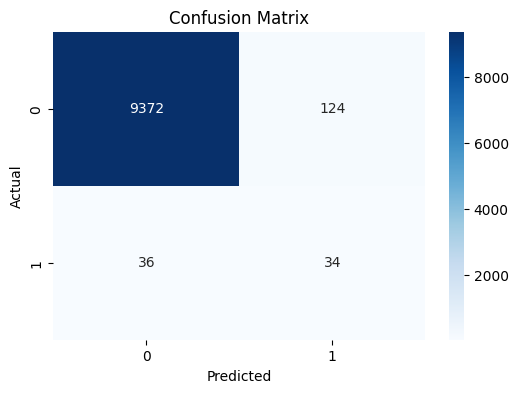

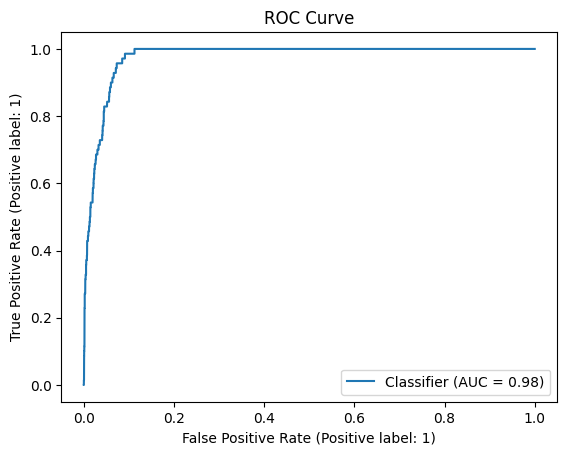

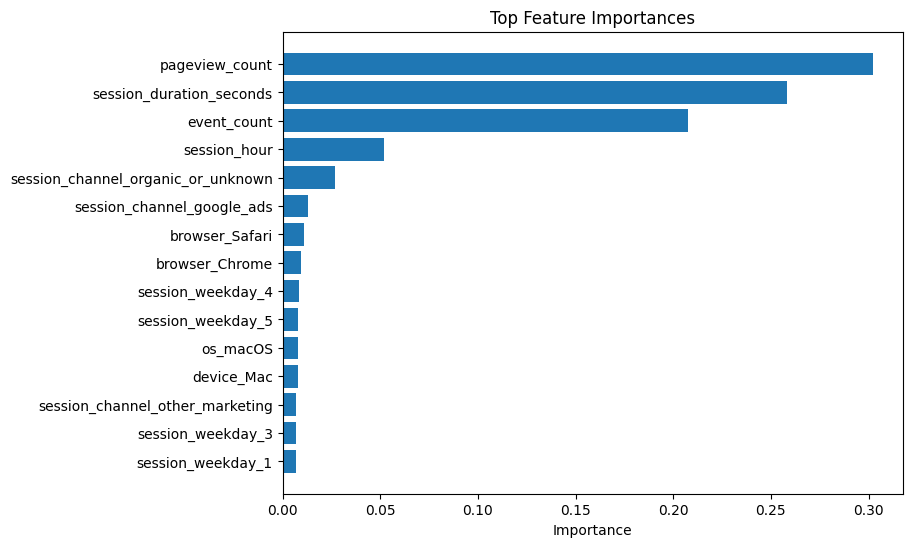

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay

# -------------------------------------------
# 1. BUILD A CLEAN, NO-LEAKAGE FEATURESET
# -------------------------------------------

sessions = fact_sessions.copy()
events = stg_with_sessions.copy()

# Target label
sessions["converted"] = (sessions["session_revenue"] > 0).astype(int)

# Time features
sessions["session_hour"] = sessions["session_start"].dt.hour
sessions["session_weekday"] = sessions["session_start"].dt.dayofweek

# -------------------------------------------
# 2. Derive CHANNEL per session
# -------------------------------------------

def detect_channel(group):
    if group["google_click_id"].notna().any():
        return "google_ads"
    if group["facebook_click_id"].notna().any():
        return "facebook_ads"
    if group["microsoft_click_id"].notna().any():
        return "microsoft_ads"
    if group[["utm_source","utm_medium","utm_campaign"]].notna().any().any():
        return "other_marketing"
    return "organic_or_unknown"

channel_map = (
    events.groupby("session_id")
    .apply(detect_channel)
    .reset_index(name="session_channel")
)

df = sessions.merge(channel_map, on="session_id", how="left")
df["session_channel"] = df["session_channel"].fillna("organic_or_unknown")

# -------------------------------------------
# 3. Select NON-LEAKING Features
# -------------------------------------------

numeric_features = [
    "event_count",
    "pageview_count",
    "session_duration_seconds",
    "session_hour",
]

categorical_features = [
    "browser",
    "os",
    "device",
    "session_channel",
    "session_weekday",
]

feature_cols = numeric_features + categorical_features

X = df[feature_cols]
y = df["converted"]

# -------------------------------------------
# 4. Train/Test Split
# -------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------------------
# 5. Preprocessing + RandomForest Model
# -------------------------------------------

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
])

model = Pipeline([
    ("prep", preprocessor),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

# -------------------------------------------
# 6. Fit Model
# -------------------------------------------

model.fit(X_train, y_train)

# -------------------------------------------
# 7. Evaluate
# -------------------------------------------

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred, digits=3))

# -------------------------------------------
# 8. Confusion Matrix Plot
# -------------------------------------------

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------------------
# 9. ROC Curve
# -------------------------------------------

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()

# -------------------------------------------
# 10. Feature Importance
# -------------------------------------------

ohe = model.named_steps["prep"].named_transformers_["cat"]["ohe"]
ohe_features = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(ohe_features)
importances = model.named_steps["rf"].feature_importances_

# Top 15
idx = np.argsort(importances)[-15:]

plt.figure(figsize=(8,6))
plt.barh(np.array(all_feature_names)[idx], importances[idx])
plt.title("Top Feature Importances")
plt.xlabel("Importance")
plt.show()

